# Life Expectancy & GDP Project

## Introduction

In this project we will analyze if there is a correlation between gross domestic product (GDP) of a country and the life expectancy of its citizens. 

The questions we will seek to answer:

- Has life expectancy increased over time on the countries we will focus?
- Has GDP increased over time in these countries?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# load data
all_data = pd.read_csv('all_data.csv')

# rename the column for life expectancy
all_data.rename(columns={'Life expectancy at birth (years)':'LEAB'}, inplace=True)

# replace 'United States of America' with 'USA' in order to save space in legends
all_data['Country'] = all_data.Country.replace(['United States of America'], ['USA'])

# explore the data
print(all_data.head(), '\n')
print(all_data.info(), '\n')
round(all_data.describe(include='all'), 2)
print('\n' + 'Countries:', all_data.Country.unique(), '\n')
print('Years:', all_data.Year.unique())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEAB     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None 


Countries: ['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe'] 

Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We will be analyzing the life expectancy and GDP values of Chile, China, Germany, Mexico, USA and Zimbabwe between the years of 2000 and 2015. Let's see first how life expectancy changed over time for each country.

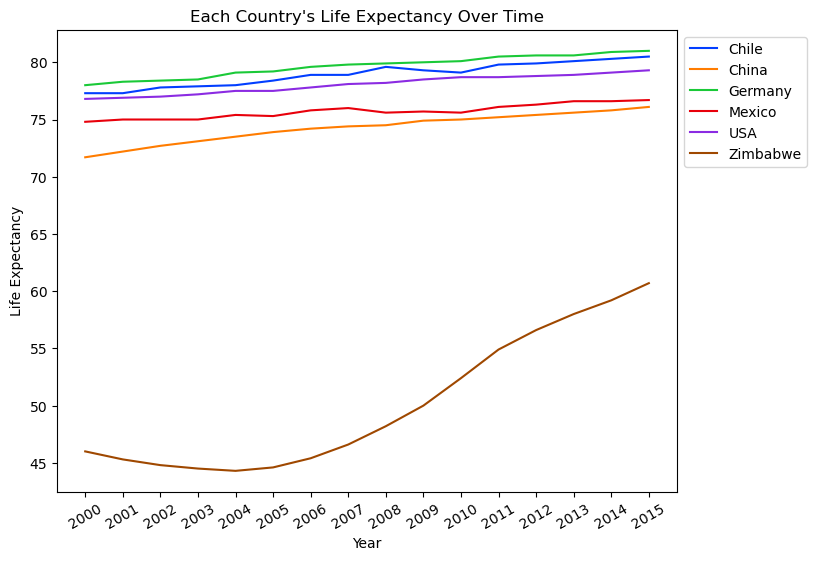

<Figure size 640x480 with 0 Axes>

In [14]:
# visualize how life expactancy changed in time for six countries

plt.figure(figsize=(8,6))
ax = plt.subplot()
sns.lineplot(x='Year', y='LEAB', hue='Country', data=all_data, palette='bright')
plt.title("Each Country's Life Expectancy Over Time", fontsize=12)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
ax.set_xticks(all_data.Year.unique())
ax.set_xticklabels(all_data.Year.unique(), rotation=30)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.savefig('leab_over_time.png', bbox_inches='tight')
plt.show()
plt.clf()

We see that Zimbabwe has a lower life expectancy rate comparing to the other countries, but it increased from 45 to 60 after 2004. Other five countries have a slight increase over time.

Now let's see how GDP made progress during the same period.

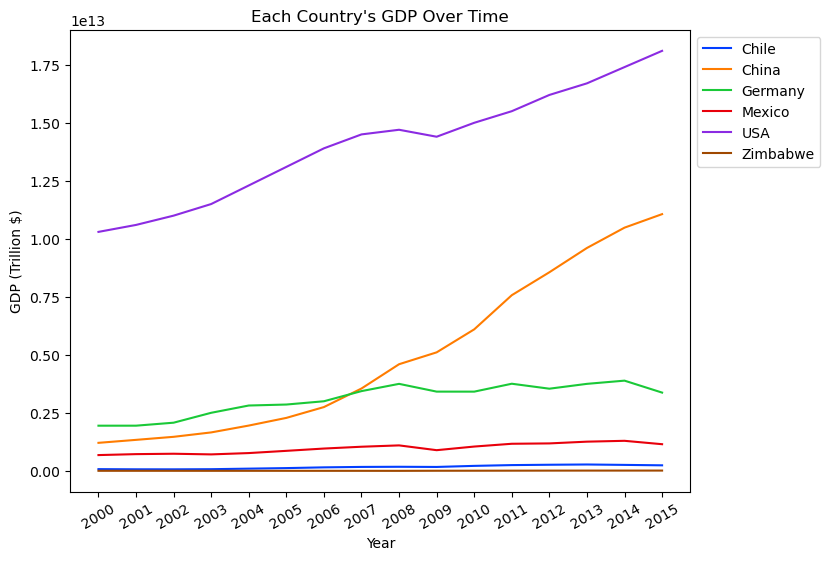

<Figure size 640x480 with 0 Axes>

In [3]:
# visualize how GDP changed in time for six countries

plt.figure(figsize=(8,6))
ax = plt.subplot()
sns.lineplot(x='Year', y='GDP', hue=all_data.Country, data=all_data, palette='bright')
plt.title("Each Country's GDP Over Time")
plt.xlabel('Year')
plt.ylabel('GDP (Trillion $)')
ax.set_xticks(all_data.Year.unique())
ax.set_xticklabels(all_data.Year.unique(), rotation=30)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.savefig('gdp_over_time.png', bbox_inches='tight')
plt.show()
plt.clf()

There is a clear increase in USA and China's GDP rates. To see the changes more clearly let's see each country's GDP and life expectancy with seperate graphics.

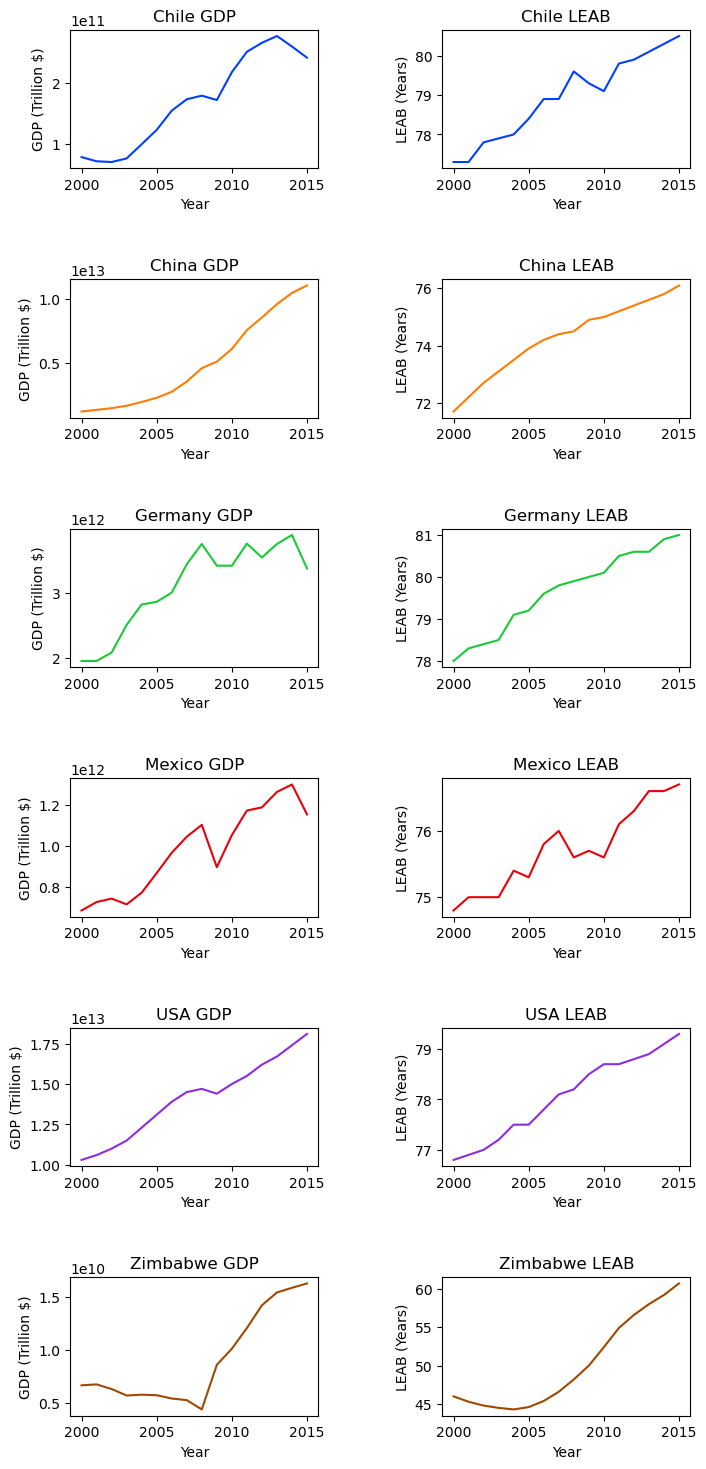

<Figure size 640x480 with 0 Axes>

In [15]:
# create lists to use in for loop
country_names = all_data.Country.unique()
bright_hex = sns.color_palette('bright').as_hex()

# create figure
plt.figure(figsize=(8, 18))
n = 1
ind = 0
for name in country_names:
    ax = plt.subplot(6, 2, n)
    sns.lineplot(x='Year', y='GDP', data=all_data[all_data['Country'] == name], color=bright_hex[ind])
    plt.title((country_names[ind]) + ' GDP')
    plt.ylabel('GDP (Trillion $)')
    ax.set_xticks(all_data['Year'])
    plt.xticks(np.arange(2000, 2016, 5))
    n += 1
    ax = plt.subplot(6, 2, n)
    sns.lineplot(x='Year', y='LEAB', data=all_data[all_data['Country'] == name], color=bright_hex[ind])
    plt.title((country_names[ind]) + ' LEAB')
    plt.ylabel('LEAB (Years)')
    plt.xticks(np.arange(2000, 2016, 5))
    n += 1
    ind += 1

plt.subplots_adjust(wspace=0.5 , hspace=0.8)
plt.savefig('gdp_leab_each_country.png')
plt.show()
plt.clf()




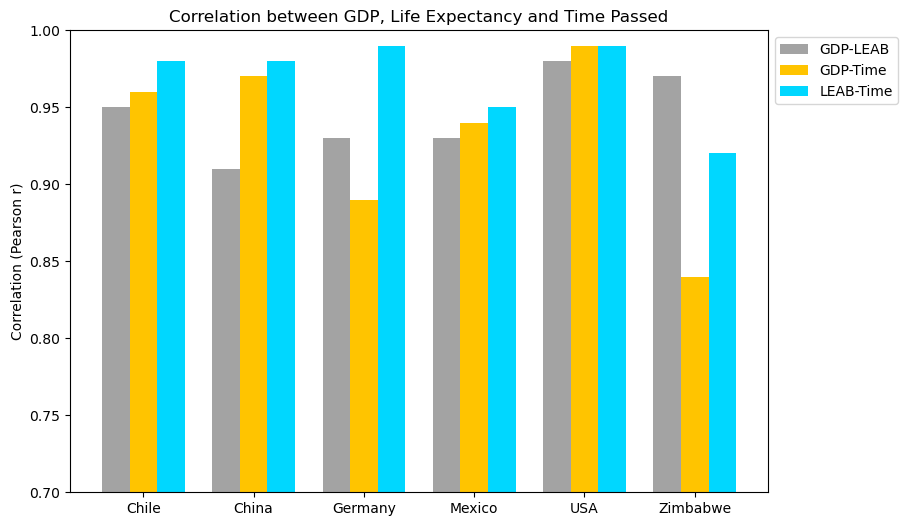

<Figure size 640x480 with 0 Axes>

In [17]:
from scipy.stats import pearsonr

# create lists to use in 'for loop'
country_names = all_data.Country.unique().tolist()
bright_hex = sns.color_palette('bright').as_hex()

cor1 = []
cor2 = []
cor3 = []

for name in country_names:
    country_data = all_data[all_data.Country == name]
    gdp = country_data.GDP
    leab = country_data.LEAB
    time = country_data.Year
    r1, p = pearsonr(gdp, leab)
    r2, p = pearsonr(gdp, time)
    r3, p = pearsonr(leab, time)
    cor1.append(round(r1, 2))
    cor2.append(round(r2, 2))
    cor3.append(round(r3, 2))


bar_width = 0.25
bar1 = np.arange(len(cor1))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]

plt.figure(figsize=(9, 6))

plt.bar(bar1, cor1, width=bar_width, label='GDP-LEAB', color=bright_hex[7])
plt.bar(bar2, cor2, width=bar_width, label='GDP-Time', color=bright_hex[8])
plt.bar(bar3, cor3, width=bar_width, label='LEAB-Time', color=bright_hex[9])

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Correlation (Pearson r)')
plt.xticks([x + bar_width for x in range(len(country_names))], country_names)
plt.ylim(0.7, 1)
plt.title('Correlation between GDP, Life Expectancy and Time Passed', fontsize=12)
plt.savefig('correlation_gdp_leab_time.png', bbox_inches='tight')
plt.show()
plt.clf()

Almost every relationship between GDP, life expectancy and time for the six countries has a correlation over 0.9 which shows that they highly affect each other positively. With that being said, the correlation between life expectancy and time passed seems to be stronger than the other two.

Let's see the average GDP and life expectancy for each country.

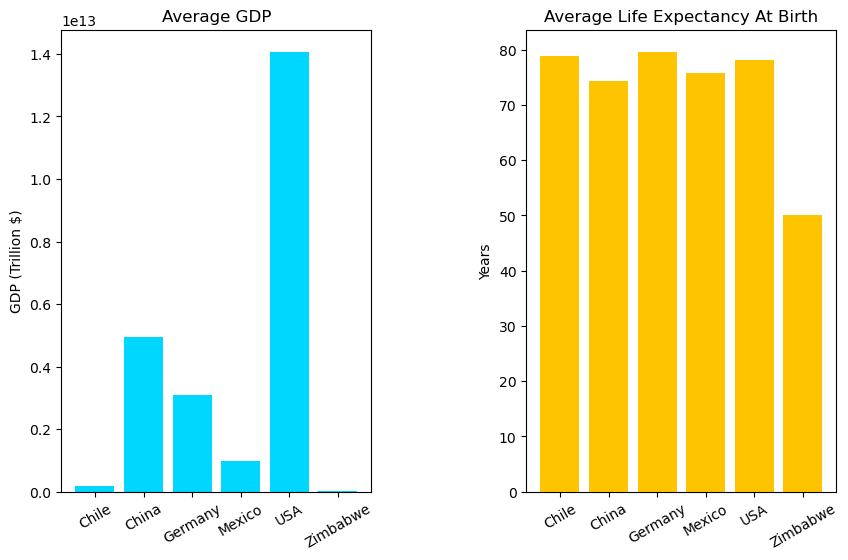

                         GDP   LEAB
Chile        169,788,845,015  78.94
China      4,957,713,750,000  74.26
Germany    3,094,775,625,000  79.66
Mexico       976,650,625,000  75.72
USA       14,075,000,000,000  78.06
Zimbabwe       9,062,579,595  50.09


<Figure size 640x480 with 0 Axes>

In [11]:
gdps = []
leabs = []

for name in country_names:
    gdp_mean = round(np.mean(all_data.GDP[all_data.Country == name]))
    leab_mean = round(np.mean(all_data.LEAB[all_data.Country == name]) , 2)
    gdps.append(gdp_mean)
    leabs.append(leab_mean)


plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 2, 1)
plt.bar(country_names, gdps, color=bright_hex[9])
plt.xticks(rotation=30)
plt.title('Average GDP')
plt.ylabel('GDP (Trillion $)')

ax2 = plt.subplot(1, 2, 2)
plt.bar(country_names, leabs, color=bright_hex[8])
plt.xticks(rotation=30)
plt.title('Average Life Expectancy At Birth')
plt.ylabel('Years')
plt.subplots_adjust(wspace=0.5)
plt.savefig('gdp_leab_means.png')
plt.show()
plt.clf()

# add commas in GDP values to see more clearly
gdps_cs = ['{:,}'.format(n) for n in gdps]

print(pd.DataFrame({'GDP': (gdps_cs), 'LEAB': leabs}, index=country_names))

This figure shows that countries with highly different GDP levels have close life expectancy rates apart from Zimbabwe.

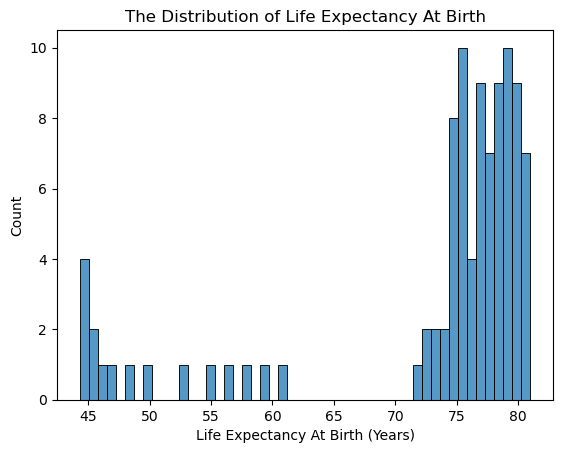

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure()
sns.histplot(x=all_data.LEAB, bins=50)
plt.xlabel('Life Expectancy At Birth (Years)')
plt.title('The Distribution of Life Expectancy At Birth')
plt.savefig('distribution_leab.png')
plt.show()
plt.clf()

It is clear that most of the life expectancy values are distributed over 70 years. We have observed in the previous graph that Zimbabwe is the only country which has an average of life expectancy below 65 years.

## Conclusion

First we observed the life expectancy at birth (LEAB) and GDP levels for each country. Then we looked at their correlation with time and with each other. After comparing their average LEAB and GDP levels, we finally looked how LEAB was distributed in terms of years.

What we have found out is:
- Zimbabwe appears to be the outlier both in GDP and LEAB in these six nations.
- The other five countries have highly different GDP levels. However, they have close life expectancy rates.
- USA has a GDP (\\$14 Trillion) 83 times more than Chile's (\\$170 Billion) but Chile's LEAB is 78.94 years whereas USA's LEAB is 78.06 years.
- China has a GDP (\\$ 5 Billion) 5 times more than Mexico's (\\$1 Billion) but Mexico's LEAB is 75.72 years whereas China's LEAB is 74.26 years.
 

At first there appears to be a strong correlation between LEAB and GDP in these nations' data, but in the last two items above tell us that, there might be other factors than just GDP (i.e. new technologies, developments in healthcare systems, local and global socio-political events etc.) to affect life expectancy. There needs to be more data about what else changed in time globally and particularly in these countries, but with the data we have at hand it is safe to say that the life expectancy at birth has a positive correlation with time passed.

Even though the GDP levels are substantially different for each country, life expectancy levels are close except Zimbabwe.